In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/data-of-1010-pokemons/pokemons.csv',index_col=0)

In [3]:
df.head()

,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
id,,,,,,,,,,,,,,,,,
1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."


In [4]:
df.reset_index(drop=True,inplace=True)
df=df[df['rank'].isin(['baby','legendary'])]
df.reset_index(drop=True,inplace=True)
df.head()

,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,articuno,legendary,generation-i,nothing,ice,flying,90,85,100,95,125,85,580,17,554,pressure snow-cloak,A legendary bird POKéMON that is said to appea...
1,zapdos,legendary,generation-i,nothing,electric,flying,90,90,85,125,90,100,580,16,526,pressure static,A legendary bird POKéMON that is said to appea...
2,moltres,legendary,generation-i,nothing,fire,flying,90,100,90,125,85,90,580,20,600,pressure flame-body,Known as the legendary bird of fire. Every fla...
3,mewtwo,legendary,generation-i,nothing,psychic,NaN,106,110,90,154,90,130,680,20,1220,pressure unnerve,It was created by a scientist after years of h...
4,pichu,baby,generation-ii,nothing,electric,NaN,20,40,15,35,35,60,205,3,20,static lightning-rod,It is not yet skilled at storing electricity. ...


# Exploratory Data Analysis

Seven Pokemon’s stats — hp, attack, defense, special attack, special defense, speed, and height — will be selected as features for rank separation.

It is always a good idea and recommended to do the Exploratory Data Analysis (EDA) to understand the dataset before conducting any technique. Thus, the following step is performing a quick EDA with the stats that we have selected.

In [5]:
select_col=['hp','atk', 'def', 'spatk', 'spdef', 'speed', 'height']
df_s=df[select_col]
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hp      89 non-null     int64
 1   atk     89 non-null     int64
 2   def     89 non-null     int64
 3   spatk   89 non-null     int64
 4   spdef   89 non-null     int64
 5   speed   89 non-null     int64
 6   height  89 non-null     int64
dtypes: int64(7)
memory usage: 5.0 KB


Fortunately, there are no null values. Next, let’s plot the Box and Whisker plots to see the distribution of these variables.

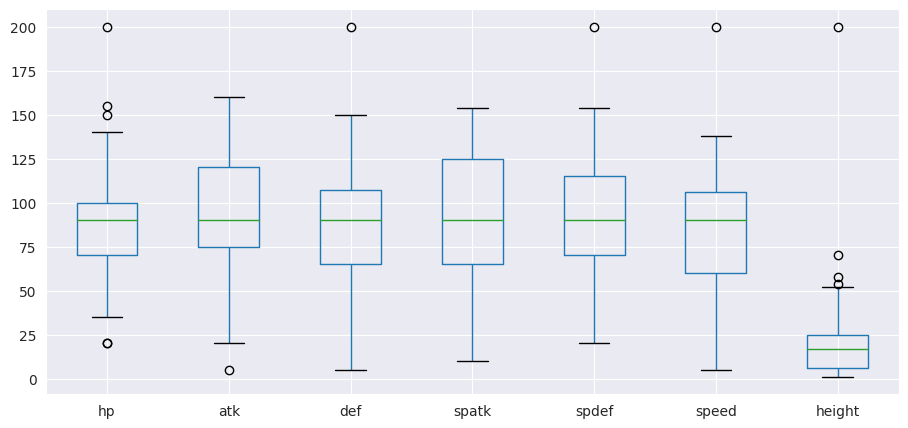

In [6]:
sns.set_style('darkgrid')
df_s.iloc[:,].boxplot(figsize=(11,5))
plt.show()

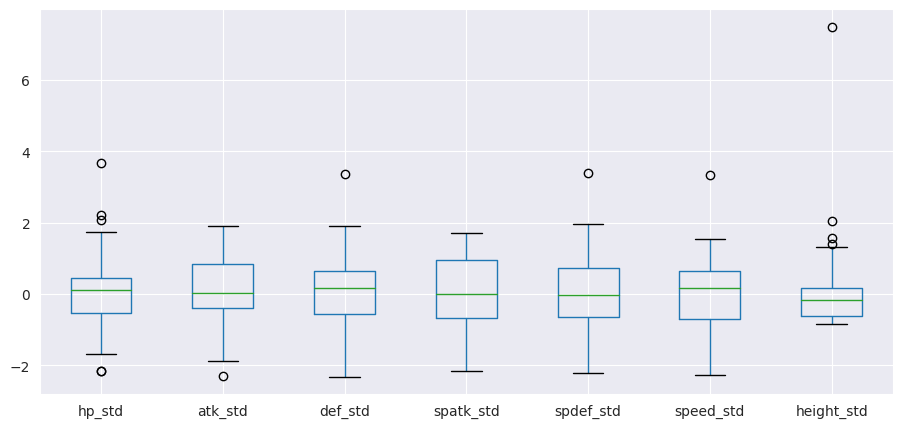

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
array_s=scaler.fit_transform(df_s)

df_scal=pd.DataFrame(array_s,columns=[i+'_std' for i in select_col])
df_scal.boxplot(figsize=(11,5))
plt.show()

The purpose of standardization is to make the values of different features comparable by scaling them to a standard range. This is particularly useful in machine learning algorithms that use distance-based metrics or gradient descent optimization, as it ensures that each feature contributes equally to the model fitting process.

By standardizing the numerical features, you center the data around 0 and rescale it so that it has a standard deviation of 1. This makes it easier to interpret the coefficients in linear models, improves the convergence rate of some optimization algorithms, and generally leads to better performance in many machine learning models.

After standardization, the distributions look better since the features’ distribution has been centered.

Due to our dataset having multiple features, we need to do the dimensionality reduction for plotting. In this case, Principal Component Analysis (PCA) can be applied to reduce the dimension.

Simplifying our dataset to get to know them, the following code shows how to reduce the number of dimensions to two using the class PCA from sklearn.decomposition. The result will be shown using Plotly’s scatter plot.

In [8]:
# from sklearn.decomposition import PCA
# import plotly.express as px

# #encoding
# dict_y = {'baby':1, 'legendary':2}
# df['s_code'] = [dict_y.get(i) for i in df['rank']]
# df.head()

# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(array_s)
# df_pca = pd.DataFrame(pca_result, columns=['PCA_1','PCA_2'])

# df = pd.concat([df, df_pca], axis=1)

# fig = px.scatter(df, x='PCA_1', y='PCA_2', hover_name='name',
#                  color='rank', opacity=0.9, 
#                  color_discrete_sequence=['red', 'blue'])
# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)
# fig.show()